In [1]:
import sys
sys.path.append("../")
import numpy as np
import os
import glob
import cv2
import csv
from utils import Tsurff, DistAverage
import pandas as pd
from tifffile import imread, imwrite
import matplotlib.pyplot as plt
from pathlib import Path
import napari
from numpy import diff, polyfit

In [2]:
Embryo = '/Users/aimachine/Dpachys_10/Dpachys_control.tif'
EmbryoSeg = '/Users/aimachine/Dpachys_10/SegDpachys_control.tif'
savedir = '/Users/aimachine/Dpachys_10/Results/'
Path(savedir).mkdir(exist_ok = True)
Xcalibration = 1 #0.034
Timeunit = 1 #10
theta = 30
fitdegree = 50

In [3]:
ListMaps, Clock, time = Tsurff(Embryo,EmbryoSeg, theta,Timeunit)

100%|██████████| 370/370 [00:52<00:00,  7.06it/s]


In [9]:
with napari.gui_qt():
              viewer = napari.view_image(imread(Embryo), name='TSURFF')
              viewer.add_labels(imread(EmbryoSeg))
              viewer.add_labels(Clock) 

In [10]:
AnteriorAngles = [90]
PosteriorAngles = [270]


/Users/aimachine/opt/anaconda3/envs/NapariTrack/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


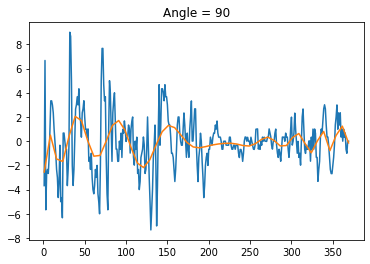

Anterior Deformation: Mean =  -0.09167736378681109 Standard Deviation =  0.9785568689513302


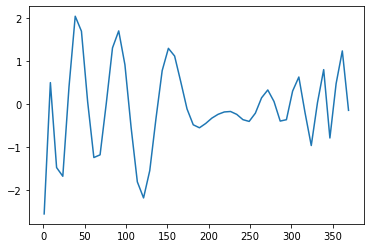

In [11]:
AnteriorAveragePoly = 0

for i in range(0, len(ListMaps)):
    
    AngleHashmap = ListMaps[i]
    for (angle,timeddistance) in AngleHashmap.items():
        for i in range(0, len(AnteriorAngles)):
                
                if angle == str(AnteriorAngles[i]):
                        timeddistance = DistAverage(timeddistance, 3)
                        timeddistance = [i * Xcalibration/Timeunit for i in timeddistance]
                        deformation = diff(timeddistance)
                        coefficients = polyfit(time[1:], deformation, fitdegree)
                        poly = np.poly1d(coefficients)
                        plt.plot(time[1:],deformation)
                        Anteriornew_x = np.linspace(time[1:][0], time[1:][-1])
                        Anteriornew_y = poly(Anteriornew_x)
                        AnteriorAveragePoly = AnteriorAveragePoly + Anteriornew_y
                        plt.plot(Anteriornew_x,Anteriornew_y)
                        plt.title( 'Angle = ' + str(angle))
                        plt.show()
                        
plt.plot(Anteriornew_x,AnteriorAveragePoly)    
print('Anterior Deformation:', 'Mean = ',np.mean(AnteriorAveragePoly), 'Standard Deviation = ', np.std(AnteriorAveragePoly))
                        

/Users/aimachine/opt/anaconda3/envs/NapariTrack/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3418: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


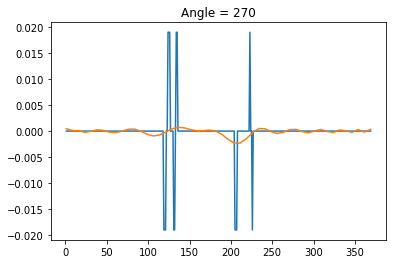

Anterior Deformation: Mean =  -0.0001349070039958807 Standard Deviation =  0.0006297489726181355


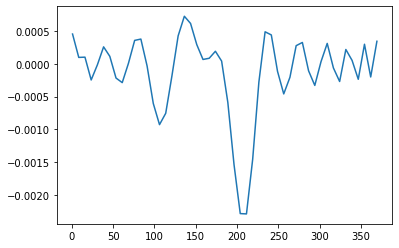

In [12]:
PosteriorAveragePoly = 0
for i in range(0, len(ListMaps)):
    
    AngleHashmap = ListMaps[i]
    for (angle,timeddistance) in AngleHashmap.items():
        for i in range(0, len(PosteriorAngles)):
                
                if angle == str(PosteriorAngles[i]):
                        timeddistance = DistAverage(timeddistance, 3)
                        timeddistance = [i * Xcalibration/Timeunit for i in timeddistance]
                        deformation = diff(timeddistance)
                        coefficients = polyfit(time[1:], deformation, fitdegree)
                        poly = np.poly1d(coefficients)
                        plt.plot(time[1:],deformation)
                        Posteriornew_x = np.linspace(time[1:][0], time[1:][-1])
                        Posteriornew_y = poly(Posteriornew_x)
                        PosteriorAveragePoly = PosteriorAveragePoly + Posteriornew_y
                        plt.plot(Posteriornew_x,Posteriornew_y)
                        plt.title( 'Angle = ' + str(angle))
                        plt.show()
                        
                       
plt.plot(Posteriornew_x,PosteriorAveragePoly)    
print('Anterior Deformation:', 'Mean = ',np.mean(PosteriorAveragePoly), 'Standard Deviation = ', np.std(PosteriorAveragePoly))
                        

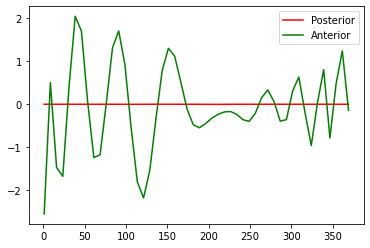

In [13]:
fig, ax = plt.subplots()
ax.plot(Posteriornew_x,PosteriorAveragePoly, 'r',Posteriornew_x,AnteriorAveragePoly, 'g' ) 

ax.legend(('Posterior', 'Anterior'),
           loc='upper right', shadow=False)
fig.savefig(savedir + "comparison" + '.png', dpi=300, bbox_inches='tight',facecolor= "white")